In [1]:
from keras.layers import (
        Input,
        TimeDistributed,
        LSTM,
        Embedding, 
        Dense, 
        Flatten
    )
from keras.models import Model
MAX_SEQUENCE_LENGTH = 200
MAX_VOCAB_SIZE = 10000
EMBEDDING_DIM: int = 300 
TIMESTEPS: int = 30
import tensorflow as tf

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_docs (InputLayer)     [(None, 30, 200)]         0         
                                                                 
 token_embedding_model (Time  (None, 30, 128)          3219648   
 Distributed)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 3,351,361
Trainable params: 351,361
Non-trainable params: 3,000,000
_________________________________________________________________


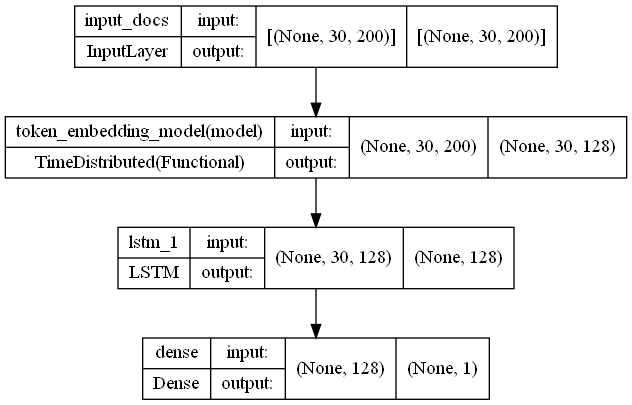

In [2]:
document_input = Input(
        shape=(MAX_SEQUENCE_LENGTH,),
        dtype="int32",
    )

embedding_layer = Embedding(
        MAX_VOCAB_SIZE,
        EMBEDDING_DIM,
        input_length=MAX_SEQUENCE_LENGTH,
        trainable=False,
    )
embedding_sequences = embedding_layer(document_input)
x = LSTM(128) (embedding_sequences)


doc_model= Model(document_input, x)

input_docs=Input(shape=(TIMESTEPS,MAX_SEQUENCE_LENGTH),name='input_docs',dtype='int32')

x = TimeDistributed(doc_model,name='token_embedding_model')(input_docs)  
x = LSTM(128) (x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(input_docs, outputs)
model.compile()
model.summary()
    
dot_img_file = '/tmp/model_1.png'
dot_img_file2 = '/tmp/model_2.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)



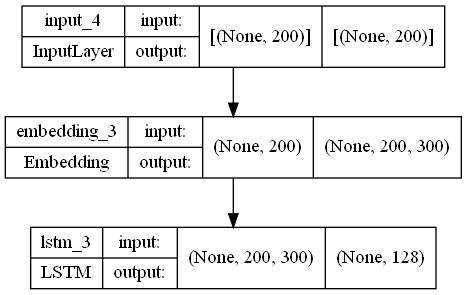

In [6]:
tf.keras.utils.plot_model(doc_model, to_file=dot_img_file2, show_shapes=True)